In [ ]:
# Part 1 - Decision Tree Implementation from Scratch

# Import
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib import gridspec
from collections import Counter

In [ ]:
# Part 1 - Decision Tree Implementation from Scratch

# Load the dataset
df = pd.read_csv("Q1Data.csv")

In [ ]:
# Part 1 - Decision Tree Implementation from Scratch

# functions

class TreeNode:
    def __init__(self, feature_index=None, threshold=None, value=None, left=None, right=None):
        self.feature_index = feature_index
        self.threshold = threshold
        self.value = value
        self.left = left
        self.right = right

def gini_index(y):
    _, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    gini = 1 - np.sum(probabilities ** 2)
    return gini

def information_gain(y, y_left, y_right):
    gini_parent = gini_index(y)
    gini_left = gini_index(y_left)
    gini_right = gini_index(y_right)

    size_parent = len(y)
    size_left = len(y_left)
    size_right = len(y_right)

    gain = gini_parent - (size_left / size_parent) * gini_left - (size_right / size_parent) * gini_right
    return gain

def find_best_split(X, y):
    m, n = X.shape
    best_gain = 0
    best_feature = None
    best_threshold = None

    for feature_index in range(n):
        # Use a random subset of values for each feature (up to 30 values)
        values = np.random.choice(X[:, feature_index], min(30, len(X)))
        thresholds = np.unique(values)

        for threshold in thresholds:
            mask = X[:, feature_index] <= threshold
            y_left = y[mask]
            y_right = y[~mask]

            if len(y_left) > 0 and len(y_right) > 0:
                gain = information_gain(y, y_left, y_right)

                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature_index
                    best_threshold = threshold

    return best_feature, best_threshold, best_gain

def build_decision_tree(X, y, depth=1, max_depth=None, min_info_gain=0.01):
    if depth == max_depth or len(np.unique(y)) == 1:
        unique_classes, counts = np.unique(y, return_counts=True)
        most_common_class = unique_classes[np.argmax(counts)]
        return TreeNode(value=most_common_class)

    best_feature, best_threshold, best_gain = find_best_split(X, y)

    if best_feature is None or best_gain < min_info_gain:
        unique_classes, counts = np.unique(y, return_counts=True)
        most_common_class = unique_classes[np.argmax(counts)]
        return TreeNode(value=most_common_class)

    mask = X[:, best_feature] <= best_threshold
    X_left, y_left = X[mask], y[mask]
    X_right, y_right = X[~mask], y[~mask]

    left_subtree = build_decision_tree(X_left, y_left, depth + 1, max_depth, min_info_gain)
    right_subtree = build_decision_tree(X_right, y_right, depth + 1, max_depth, min_info_gain)

    return TreeNode(feature_index=best_feature, threshold=best_threshold, left=left_subtree, right=right_subtree)

def predict_tree(node, X):
    if node.value is not None:
        return node.value

    if X[node.feature_index] <= node.threshold:
        return predict_tree(node.left, X)
    else:
        return predict_tree(node.right, X)

def predict(tree, X):
    return np.array([predict_tree(tree, x) for x in X])



In [ ]:
# Part 1 - Decision Tree Implementation from Scratch

# Extract features and target variable
X = df.iloc[:, :6].values
y = df["Genus"].values

# Split the dataset into training and testing sets (20:80 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=41)


In [ ]:
# Part 1 - Decision Tree Implementation from Scratch

# Train Decision Tree Classifier with varying depths and pre-pruning
depths_tree_scratch = list(range(1, 16))
test_accuracies_tree_scratch = []

for depth in depths_tree_scratch:
    tree = build_decision_tree(X_train, y_train, max_depth=depth, min_info_gain=0.01)
    predictions = predict(tree, X_test)
    accuracy = accuracy_score(y_test, predictions)
    test_accuracies_tree_scratch.append(accuracy)

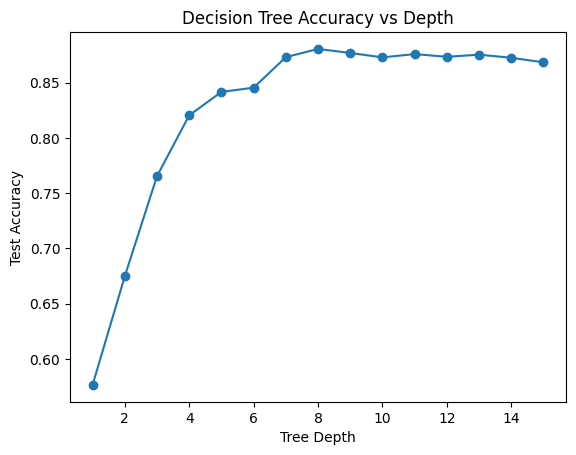

In [ ]:
# Part 1 - Decision Tree Implementation from Scratch

# Plotting the test accuracies vs. tree depth
plt.plot(depths_tree_scratch, test_accuracies_tree_scratch, marker='o')
plt.title('Decision Tree Accuracy vs Depth')
plt.xlabel('Tree Depth')
plt.ylabel('Test Accuracy')
plt.show()

**Observations:**


*   At low depth, the accuracy of the decision tree is quite low.
*   Accuracy can be seen increasing with increase in depth upto a certain point and then reaches a plateau.
*   With more increase in depth, the accuracy of the decision tree may decrease due to overfitting.





In [ ]:
# Part 2 - K-NN implementation from scratch

# Function to calculate Euclidean distance between two points
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Function to predict the label using k-nearest neighbors
def knn_predict(X_train, y_train, X_test, k):
    predictions = []

    for test_point in X_test:
        # Calculate distances from the test point to all training points
        distances = [euclidean_distance(test_point, train_point) for train_point in X_train]

        # Get indices of k-nearest neighbors
        k_neighbors_indices = np.argsort(distances)[:k]
        #print("k_neighbors_indices:", k_neighbors_indices)

        # Get labels of k-nearest neighbors
        k_neighbors_labels = y_train[k_neighbors_indices]

        # Predict the label based on majority voting
        predicted_label = Counter(k_neighbors_labels).most_common(1)[0][0]
        predictions.append(predicted_label)


    return np.array(predictions)



In [ ]:
# Part 2 - K-NN implementation from scratch

# Extract features and target variable
X = df.iloc[:, :-3].values  # Exclude the last three columns (Family, Genus, Species)
y = df["Genus"].values


In [ ]:
# Part 2 - K-NN implementation from scratch

# Split the dataset into training and testing sets
X_needed, X_not, y_needed, y_not = train_test_split(X, y, test_size=0.6, random_state=41)
X_train, X_test, y_train, y_test = train_test_split(X_needed, y_needed, test_size=0.25, random_state=41)


In [ ]:
# Part 2 - K-NN implementation from scratch

# Train kNN Classifier with varying k values
k_values_knn_scratch = list(range(1, 51))
test_accuracies_knn_scratch = []

for k in k_values_knn_scratch:
    predictions = knn_predict(X_train, y_train, X_test, k)
    accuracy = accuracy_score(y_test, predictions)
    test_accuracies_knn_scratch.append(accuracy)
    # if(k==50):
    #   print(accuracy)

0.9069444444444444


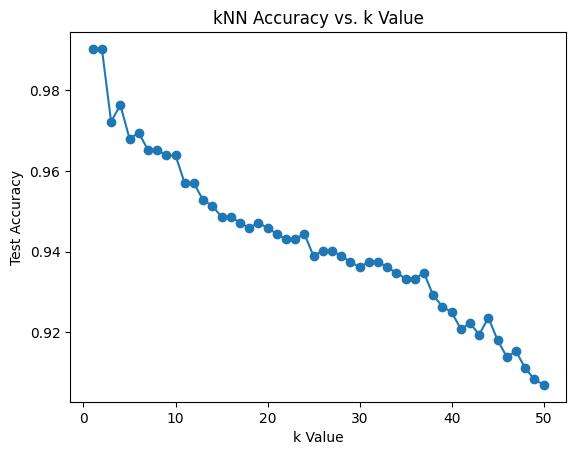

In [ ]:
# Part 2 - K-NN implementation from scratch

#Plotting the test accuracies vs. k values
plt.plot(k_values_knn_scratch, test_accuracies_knn_scratch, marker='o')
plt.title('kNN Accuracy vs. k Value')
plt.xlabel('k Value')
plt.ylabel('Test Accuracy')
plt.show()


**Observations:**


*   For smaller values of k such as 1,2,3 etc. the accuracy is close to 100%.
*   Accuracy can be seen decreasing with increase in k value.


In [ ]:
# Part 3

# Decision Tree using inbuilt library

# Extract features and target variable
X = df.iloc[:, :-3]  # Features (MFCCs)
y = df["Genus"]  # Target variable

# Split the dataset into training and testing sets (80:20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

# Train Decision Tree Classifier with varying depths
depths_tree_inbuilt = list(range(1, 16))
test_accuracies_tree_inbuilt = []

for depth in depths_tree_inbuilt:
    # Initialize Decision Tree Classifier
    clf = DecisionTreeClassifier(max_depth=depth, random_state=41)

    # Train the classifier
    clf.fit(X_train, y_train)

    # Evaluate the accuracy on the test set
    test_accuracy = clf.score(X_test, y_test)
    test_accuracies_tree_inbuilt.append(test_accuracy)




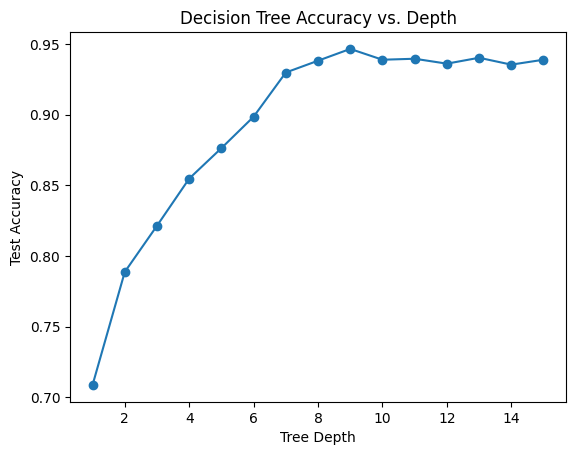

In [ ]:
#Part 3

# Plotting the test accuracies vs. tree depth
plt.plot(depths_tree_inbuilt, test_accuracies_tree_inbuilt, marker='o')
plt.title('Decision Tree Accuracy vs. Depth')
plt.xlabel('Tree Depth')
plt.ylabel('Test Accuracy')
plt.show()

In [ ]:
#Part 3

# KNN using inbuilt library

# Extract features and target variable
X = df.iloc[:, :21].values  # All 21 features
y = df["Genus"].values  # Target variable

# Split the dataset into training and testing sets (80:20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train k-Nearest Neighbors Classifier with varying k values
k_values_knn_inbuilt = list(range(1, 1001))
test_accuracies_knn_inbuilt = []

for k in k_values_knn_inbuilt:
    # Initialize KNeighborsClassifier
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    # Train the classifier
    knn_classifier.fit(X_train, y_train)

    # Evaluate the accuracy on the test set
    test_accuracy = knn_classifier.score(X_test, y_test)
    test_accuracies_knn_inbuilt.append(test_accuracy)
    # if(k==50):
    #   print(test_accuracy)



0.9589993050729674


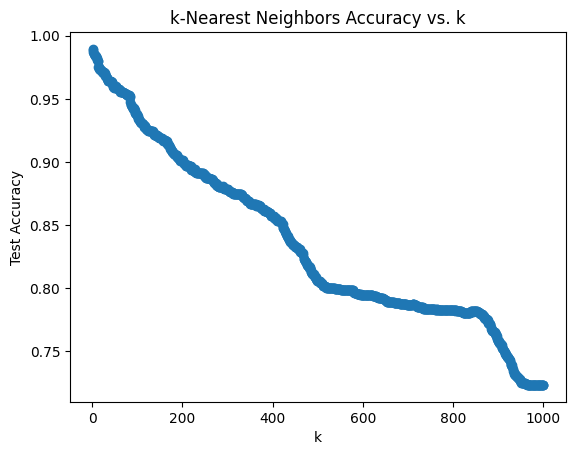

In [ ]:
#Part 3

# Plotting the test accuracies vs. k values
plt.plot(k_values_knn_inbuilt, test_accuracies_knn_inbuilt, marker='o')
plt.title('k-Nearest Neighbors Accuracy vs. k')
plt.xlabel('k')
plt.ylabel('Test Accuracy')
plt.show()

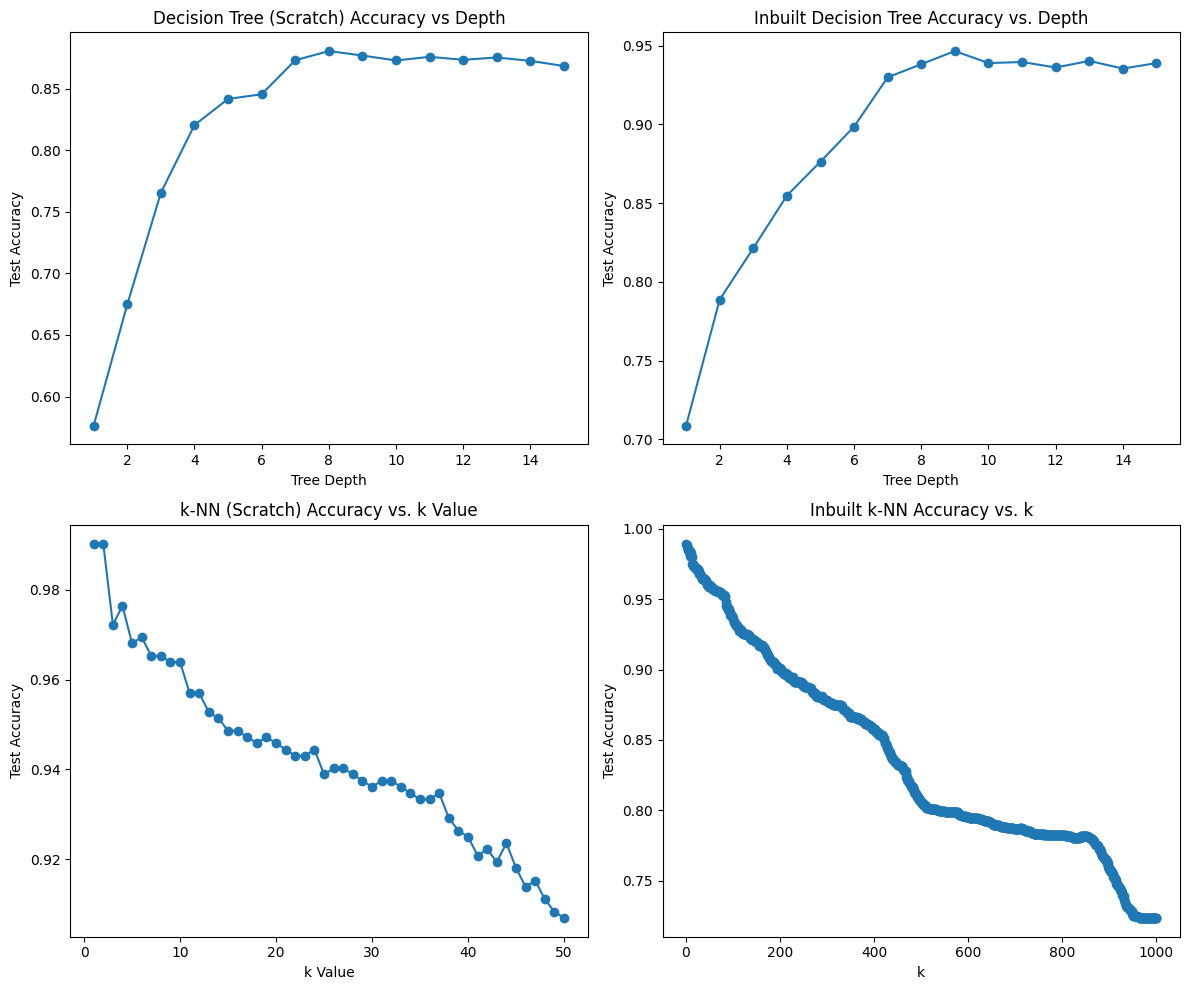

In [ ]:
# Part 3

# subplot of all 4 graphs
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Decision Tree (Scratch) subplot
axes[0, 0].plot(depths_tree_scratch, test_accuracies_tree_scratch, marker='o')
axes[0, 0].set_title('Decision Tree (Scratch) Accuracy vs Depth')
axes[0, 0].set_xlabel('Tree Depth')
axes[0, 0].set_ylabel('Test Accuracy')

# Inbuilt Decision Tree subplot
axes[0, 1].plot(depths_tree_inbuilt, test_accuracies_tree_inbuilt, marker='o')
axes[0, 1].set_title('Inbuilt Decision Tree Accuracy vs. Depth')
axes[0, 1].set_xlabel('Tree Depth')
axes[0, 1].set_ylabel('Test Accuracy')

# k-NN (Scratch) subplot
axes[1, 0].plot(k_values_knn_scratch, test_accuracies_knn_scratch, marker='o')
axes[1, 0].set_title('k-NN (Scratch) Accuracy vs. k Value')
axes[1, 0].set_xlabel('k Value')
axes[1, 0].set_ylabel('Test Accuracy')

# Inbuilt k-NN subplot
axes[1, 1].plot(k_values_knn_inbuilt, test_accuracies_knn_inbuilt, marker='o')
axes[1, 1].set_title('Inbuilt k-NN Accuracy vs. k')
axes[1, 1].set_xlabel('k')
axes[1, 1].set_ylabel('Test Accuracy')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


**Observations:**


*   Decison Tree
    *   Test Accuracy vs Tree Depth plots follows same pattern for both the implementations (scratch and using inbuilt). The accuracy can be seen increasing with increase in depth and then becomes fairly constant.
    *  Maximum accuracy can be seen at depth equals to 9 in both implementations with values of about 89% in implementation from scratch and about 94% in implementation using inbuilt functions.
    *  Overall accuracy of model with inbuilt functions is slightly better (by approx 5%) than model built from scratch.

*   K-NN
    *   Test Accuracy vs K plots follows same pattern for both the implementations (scratch and using inbuilt). The accuracy can be seen decreasing with increase in value of k.
    *  Overall accuracy of model with inbuilt functions is slightly better (by approx 5%) than model built from scratch.




